### Tutorial for DBN
This tutorial illustrates how the DBN framework can be used.

imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from delaybuffernetwork import DelayBufferNetwork
from generate_dbn_schedule import *

Next we generate a schedule. Here we choose to have 100 agents, with two agent types; a and b. Each event has to have 2 agents of type a, and 2 agents of type b.

In [2]:
n_agents = 100
agents = np.arange(0, n_agents).tolist()
agent_types = ["a", "b"] # agent types
event_rules = [2, 2] # number of agents for each agent type per event
events_per_timestep = 10 # events per timestep

# Number of agents in an event per time step = sum(event_rules) * events_per_timestep = 40. Sparsity = 60%

time_range = (0, 100) 
time_step = 1

schedule = generate_dbn_schedule(100, agent_types, time_range, time_step, event_rules, events_per_timestep, randomness_events=False, randomness_rule=False)


With our schedule we can build a DBN. First we will use the DF framework.

We build a DBN object, add exponential noise as delay, uniform buffers of size 1, and then we process.

We extract the time range from the df, along with the mean agent delay over time, which we then plot.

Finally we print the df for inspection

100%|██████████| 1000/1000 [00:04<00:00, 230.57it/s]


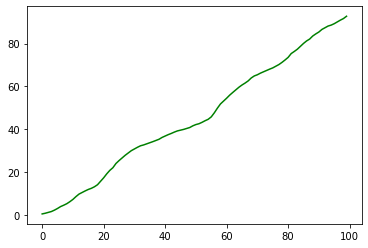

,i,j,t,weight,event_id,buffer,delay,agent_0_delay,agent_1_delay,agent_2_delay,...,agent_91_delay_realtime,agent_92_delay_realtime,agent_93_delay_realtime,agent_94_delay_realtime,agent_95_delay_realtime,agent_96_delay_realtime,agent_97_delay_realtime,agent_98_delay_realtime,agent_99_delay_realtime,current_event_delay
0,42,19,0,0.25,0,1,2.841160,0.0000,2.566107,0.359026,...,0,0,0,0,0,0,0,0,0,2.841160
1,42,98,0,0.25,0,1,2.841160,0.0000,2.566107,0.359026,...,0,0,0,0,0,0,0,0,0,2.841160
2,42,87,0,0.25,0,1,2.841160,0.0000,2.566107,0.359026,...,0,0,0,0,0,0,0,0,0,2.841160
3,19,42,0,0.25,0,1,2.841160,0.0000,2.566107,0.359026,...,0,0,0,0,0,0,0,0,0,2.841160
4,19,98,0,0.25,0,1,2.841160,0.0000,2.566107,0.359026,...,0,0,0,0,0,0,0,0,0,2.841160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,84,65,99,0.25,999,1,1.182235,91.7829,95.035589,94.786525,...,0,0,0,0,0,0,0,0,0,95.179948
11996,84,11,99,0.25,999,1,1.182235,91.7829,95.035589,94.786525,...,0,0,0,0,0,0,0,0,0,95.179948
11997,11,95,99,0.25,999,1,1.182235,91.7829,95.035589,94.786525,...,0,0,0,0,0,0,0,0,0,95.179948
11998,11,65,99,0.25,999,1,1.182235,91.7829,95.035589,94.786525,...,0,0,0,0,0,0,0,0,0,95.179948


In [3]:
dbn_df = DelayBufferNetwork(from_df=schedule, system="df")
dbn_df.add_delay(tau=1)
dbn_df.add_event_buffer(buffer = 1, epsilon=0)
dbn_df.process_delays(dynamic_topology=False, loading_bar=True)

x = dbn_df.network["t"]
all_agent_delays = np.sum(dbn_df.network[dbn_df.all_agent_delays_array], axis = 1) / len(dbn_df.unique_agents)

plt.plot(x, all_agent_delays, c="g")

plt.show()

dbn_df.network

Now we start with the Dict-based graph system. The process is less involved than the DF system.

100%|██████████| 1000/1000 [00:00<00:00, 1550.09it/s]

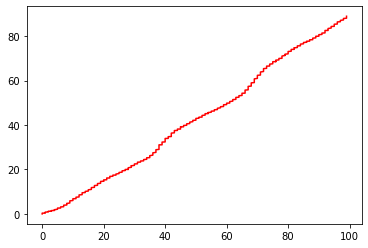

100%|██████████| 1000/1000 [00:00<00:00, 1398.29it/s]


In [4]:
dbn_dict = DelayBufferNetwork(from_df=schedule, system="dict")
dbn_dict.add_delay(tau = 1)
dbn_dict.add_event_buffer(buffer = 1, epsilon=0)
dbn_dict.process_delays(dynamic_topology=False, loading_bar=True)

plt.plot(dbn_dict.event_time_array[:, 1], dbn_dict.agent_delays.mean(axis=1), c="red")

Lastly, the array system.

100%|██████████| 1000/1000 [00:00<00:00, 1601.16it/s]

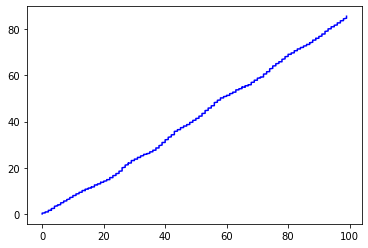

100%|██████████| 1000/1000 [00:00<00:00, 1358.39it/s]


In [5]:
dbn_array = DelayBufferNetwork(from_df=schedule, system="array")
dbn_array.add_delay(tau=1)
dbn_array.add_event_buffer(buffer = 1, epsilon=0)
dbn_array.process_delays(dynamic_topology=False, loading_bar=True)

plt.plot(dbn_array.event_time_array[:, 1], dbn_array.agent_delays.mean(axis=1), c="b")

Let's try out the dynamic topology. In order to find the right delays at the right times we have to do some work. Dynamic topology causes events to take place at continuous time steps, and to find out when our events are delayed we need to add event delays to our event times. 

100%|██████████| 1000/1000 [00:00<00:00, 1115.16it/s]

                 agents           t     delay  buffer  current_event_delay
0.0    [19, 42, 98, 87]    1.126794  1.126794       1             1.126794
1.0    [45, 78, 59, 89]    0.543806  0.543806       1             0.543806
2.0     [36, 86, 24, 2]    0.833680  0.833680       1             0.833680
3.0    [75, 97, 16, 85]    0.225632  0.225632       1             0.225632
4.0      [1, 7, 58, 63]    0.230717  0.230717       1             0.230717
...                 ...         ...       ...     ...                  ...
995.0  [28, 32, 46, 59]  182.110624  0.828783       1            83.110624
996.0  [45, 86, 58, 83]  184.625646  1.209623       1            85.625646
997.0  [12, 66, 54, 63]  183.286828  0.384904       1            84.286828
998.0  [42, 79, 98, 30]  184.220801  3.020578       1            85.220801
999.0  [65, 95, 84, 11]  179.959344  0.030401       1            80.959344

[1000 rows x 5 columns]


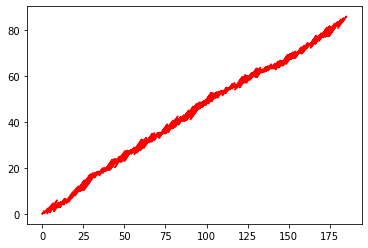

100%|██████████| 1000/1000 [00:01<00:00, 978.00it/s] 


In [16]:
dbn_dict = DelayBufferNetwork(from_df=schedule, system="dict")
dbn_dict.add_delay(tau = 1)
dbn_dict.add_event_buffer(buffer = 1, epsilon=0)
dbn_dict.process_delays(dynamic_topology=True, loading_bar=True)

df = pd.DataFrame.from_dict(dbn_dict.event_dict, orient="index")
print(df)
plt.plot(df["t"], df["current_event_delay"], c="red")

The time range is stretched because we allowed events to occur later if they are delayed. We can see that the total delay at the end of the simulation is slightly lower, this is because some connections are broken due to the delay, and thus less routes are possible. This causes less total delay spreading over the simulation.